# Loan Eligibility Prediction

- Import libraries
- Load dataset
- Explore the daraset (overview)
- Visualize the dataset
- Target distribution
- Univariate analysis: categorical columns
- Univariate analysis: numerical features
- Handle outliers ( feature engineering)
- encoding categorical variables
- Transformation
- StandardScaler
- Train test split
- Logistic regression


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## Load Dataset

In [2]:
loan = pd.read_csv('Loan Eligibility Prediction.csv')
loan.head(5)

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N
1,15,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y
2,95,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y
3,134,Male,Yes,0,Graduate,Yes,3459,0.0,25,120,1,Semiurban,Y
4,556,Male,Yes,1,Graduate,No,5468,1032.0,26,360,1,Semiurban,Y


In [3]:
# or mthd 2

# path = r'C:\Users\Michael Ichenihi\Desktop\EDA\Loan Eligibility Prediction.csv'
# loan1 = pd.read_csv(path)
# loan1.head(5)

In [4]:
loan.columns

Index(['Customer_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant_Income', 'Coapplicant_Income',
       'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

## Explore the Dataset(Overview)

In [5]:
# Get info on the number of rows and columns
print(loan.shape)
loan.info()

(614, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         614 non-null    int64  
 1   Gender              614 non-null    object 
 2   Married             614 non-null    object 
 3   Dependents          614 non-null    int64  
 4   Education           614 non-null    object 
 5   Self_Employed       614 non-null    object 
 6   Applicant_Income    614 non-null    int64  
 7   Coapplicant_Income  614 non-null    float64
 8   Loan_Amount         614 non-null    int64  
 9   Loan_Amount_Term    614 non-null    int64  
 10  Credit_History      614 non-null    int64  
 11  Property_Area       614 non-null    object 
 12  Loan_Status         614 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 62.5+ KB


- Our dataset has 614 rows and 13 columns
- of the 13 columns the first one is custimer id of which we cant perform analysis on it.
- The remaining 12 columns consists of 6 categorical columns and 6 numerical columns. 
- The last column'Loan_Status' is the target variable


In [6]:
# Checking for missing values
loan.isnull().sum()

Customer_ID           0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

- There are no missing values in the dataset

In [7]:
loan.drop(loan.columns[0], axis=1, inplace=True)

In [8]:
# Checking summary statistics
loan.describe()

,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.856678,5403.459283,1621.245798,142.022801,338.892508,0.850163
std,1.216651,6109.041673,2926.248369,87.083089,69.716355,0.357203
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,98.000000,360.000000,1.000000
50%,0.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,2.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,4.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [9]:
# finding the unique values in each column
loan.nunique()

Gender                  2
Married                 2
Dependents              4
Education               2
Self_Employed           2
Applicant_Income      505
Coapplicant_Income    287
Loan_Amount           208
Loan_Amount_Term       10
Credit_History          2
Property_Area           3
Loan_Status             2
dtype: int64

## Visualize the Dataset (Overview)

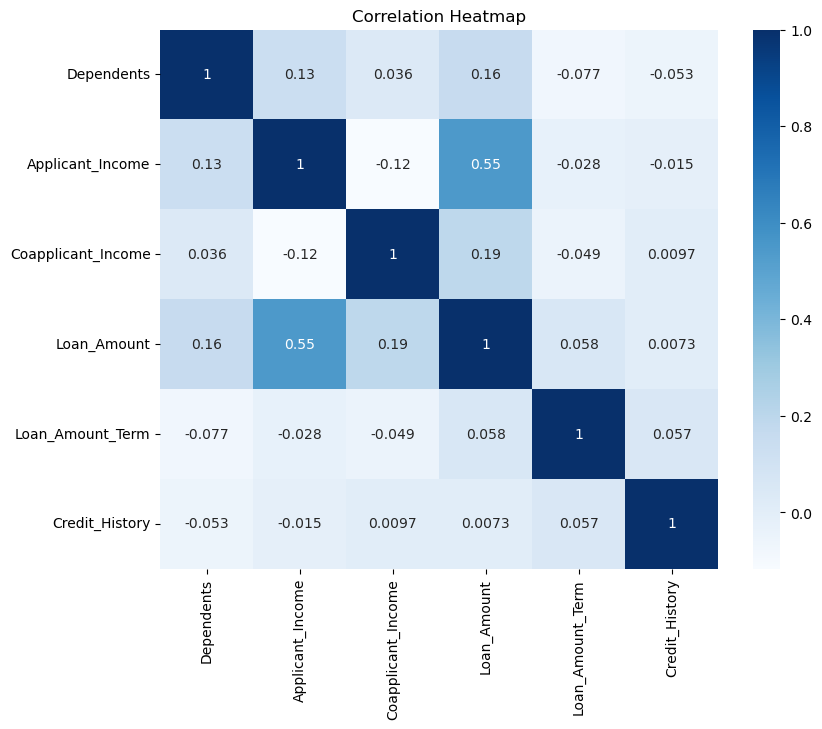

In [10]:
# Correlation matrix for numerical columns
plt.figure(figsize=(9,7))
sns.heatmap(loan.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

- From the heatmap Applicant income is fairly positively correlated to loan amount
- This is a good sign since when training a logistic regression model the numerical values should be fairly or moderately correlated.
- Highly correlated variables makes it difficult for the model to distinguish the individual effect of each variable on the outcome
- Multicollinearity inflates the standard errors of the coefficients, making the coefficients less precise
- Multicollinearity causes overfitting, as the model becomes overly sensitive to flactuations in the training data

## Target Distribution (Loan-Status)

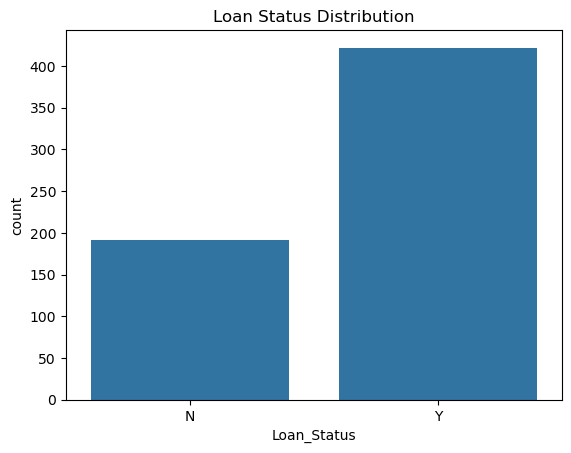

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

In [11]:
sns.countplot(x='Loan_Status', data=loan)
plt.title('Loan Status Distribution')
plt.show()

loan['Loan_Status'].value_counts(normalize=True)

- This shows how balanced or imbalanced is our target variable
- From the distribution it is clear that our data frame is imbalanced but not severely

## Univariate Analysis - Categorical Columns

In [12]:
loan.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

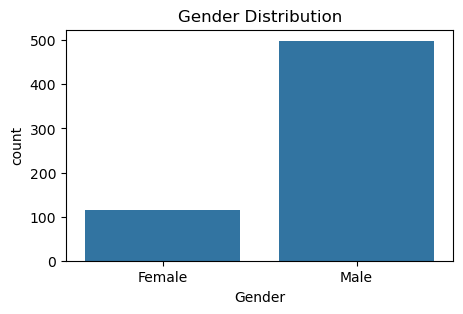

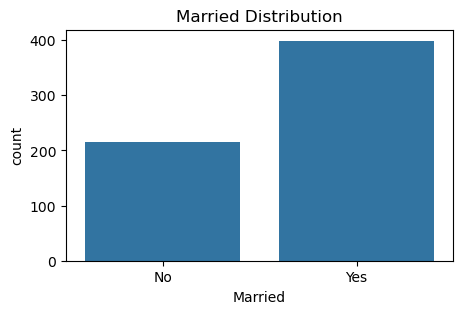

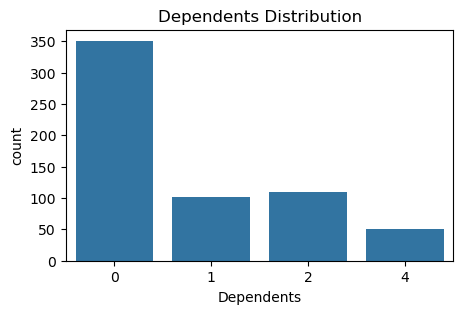

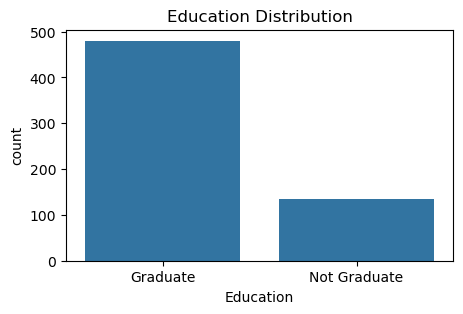

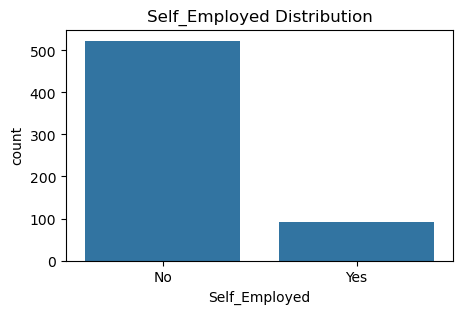

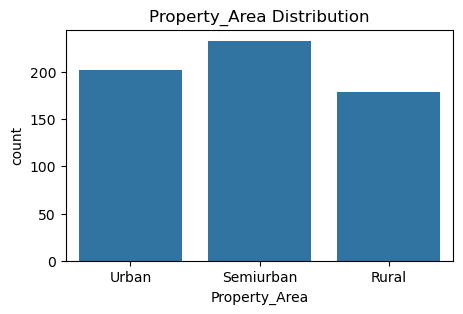

In [13]:
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area']

for col in categorical_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(x=col,data=loan)
    plt.title(f'{col} Distribution')
    plt.show()

- From the visuals we are able to understand categorical variables frequencies
- I used the for loop to plot all bar graphs at once
- most of the applicants were not employed

## Univariate Analysis - Numerical Features

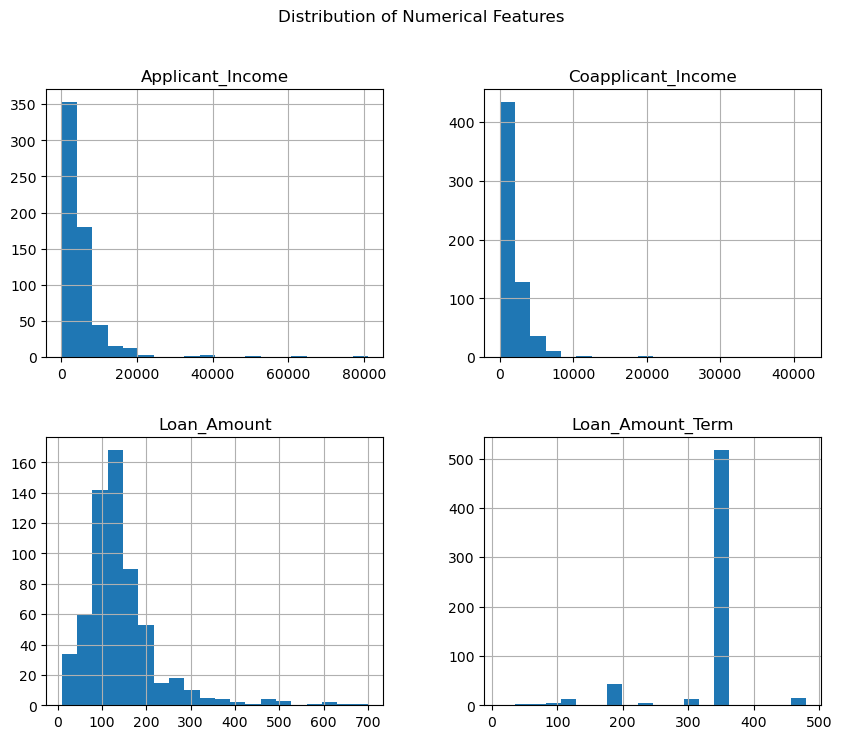

In [14]:
numerical_cols = ['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount',
       'Loan_Amount_Term']

loan[numerical_cols].hist(figsize=(10,8), bins = 20)
plt.suptitle('Distribution of Numerical Features')
plt.show()

- This shows if our independent data is skewed or not
- Applicant income, coaplicant income and loan_amount are all positively skewed
- it also shows if the variables are normally distributed

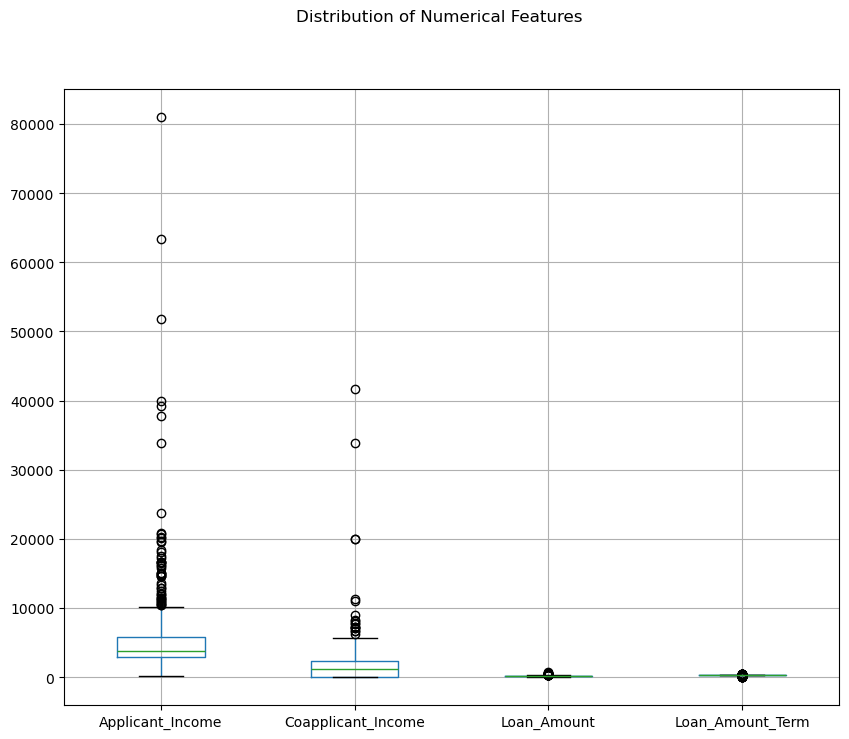

In [15]:
loan[numerical_cols].boxplot(figsize=(10,8))
plt.suptitle('Distribution of Numerical Features')
plt.show()

- The boxplots confirm that there are outliers in the numerical variables

## Handling Outliers

In [16]:
# Function to cap outliers
def cap_outliers(df, column): # takes my dataframe loan and column numerical columns
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1-1.5*IQR # The standard limits of outlier detaection
    upper = Q3+1.5*IQR

    df[column] = np.where(df[column]<lower, lower,
                          np.where(df[column]>upper, upper, df[column])) # replaces outliers with the closest acceptable value
    
    return df

# The function first checks if value is lower than acceptable value and replaces it with lower
# if higher than the highets acceptable value it replaces it with the higher acceptable
# else, it keeps the original value

#Apply function to the loan dataframe
for col in numerical_cols:
    loan = cap_outliers(loan, col)

## Encoding Categorical Variables

Machine learning nood numerical data for training

In [17]:
loan.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [18]:
# label encoding
labelencoder = LabelEncoder()
loan['Gender'] = labelencoder.fit_transform(loan['Gender'].astype(str))
loan['Married'] = labelencoder.fit_transform(loan['Married'].astype(str))
loan['Education'] = labelencoder.fit_transform(loan['Education'].astype(str))
loan['Self_Employed'] = labelencoder.fit_transform(loan['Self_Employed'].astype(str))
loan['Property_Area'] = labelencoder.fit_transform(loan['Property_Area'].astype(str))
loan['Loan_Status'] = labelencoder.fit_transform(loan['Loan_Status'].astype(str))

In [19]:
loan.head(5)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,0,2378.0,0.0,9.0,360.0,1,2,0
1,1,1,2,0,0,1299.0,1086.0,17.0,360.0,1,2,1
2,1,0,0,1,0,3620.0,0.0,25.0,360.0,1,1,1
3,1,1,0,0,1,3459.0,0.0,25.0,360.0,1,1,1
4,1,1,1,0,0,5468.0,1032.0,26.0,360.0,1,1,1


## Handling Missing Values (Transformation)

In [20]:
# if missing values were present
# Fill missing numeric values with median
## loan[numerical_cols] = loan[numerical-cols].fillna(loan[numerical_cols].median())

# Fill missing categorical values with mode (most frequent)
## loan[categorical_cols] = loan[categorical_cols].fillna(loan[categorical_cols].mode().iloc[0])

## Feature Scaling (StandardScaler)

In [21]:
scaler = StandardScaler()
loan[numerical_cols]=scaler.fit_transform(loan[numerical_cols])

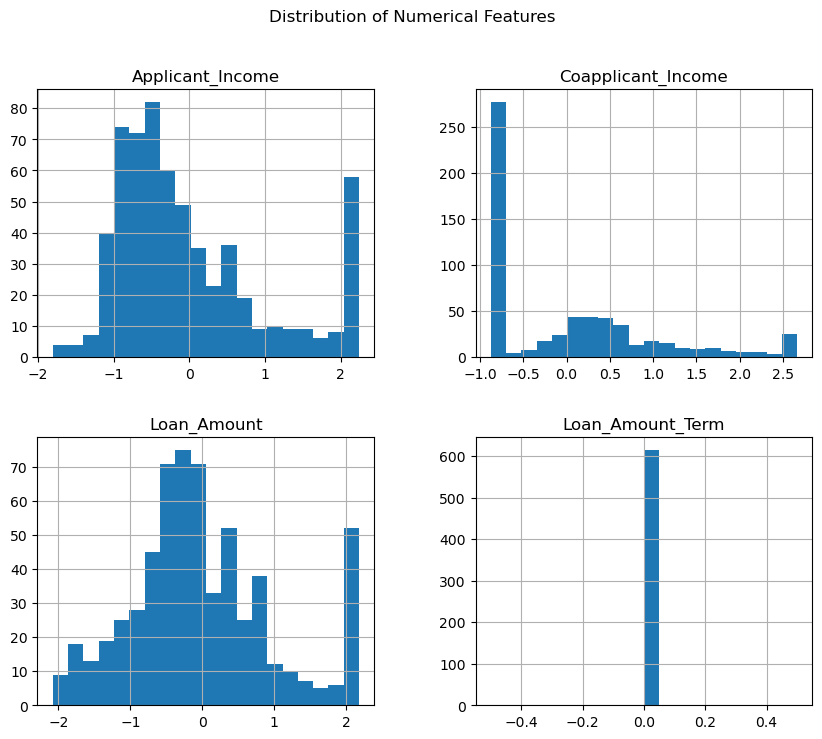

In [22]:
# Verification

loan[numerical_cols].hist(figsize=(10,8), bins = 20)
plt.suptitle('Distribution of Numerical Features')
plt.show()

- As shown above all features are now on the same scale for better performance

### Why Feature Scaling is Important

- Features with vastly different scales can cause problems from certain machine learning models
- Faster Convergence
- Prevent feature domination
- Improve model performance

## Train-Test Split

In [23]:
# Split x and y into training and testing sets
# stratify = y ensures the proportion of different classes in the original dataset is preserved in both the training and testing subsets

x = loan.drop(['Loan_Status'], axis=1)
y = loan['Loan_Status']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.2, random_state =42, stratify = y)

print(x_train.shape, x_test.shape)


(491, 11) (123, 11)


## Logistic Regression Model

In [24]:
model = LogisticRegression(max_iter = 200)
model.fit(x_train, y_train)

# Predictions
y_pred = model.predict(x_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8048780487804879
Confusion Matrix:
 [[18 20]
 [ 4 81]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.47      0.60        38
           1       0.80      0.95      0.87        85

    accuracy                           0.80       123
   macro avg       0.81      0.71      0.74       123
weighted avg       0.81      0.80      0.79       123



### Checking for Overfitting or Underfitting

In [25]:
# The scores of the training and testing sets

print('Training set score: {:.4f}'.format(model.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(model.score(x_test, y_test)))

Training set score: 0.8045
Test set score: 0.8049


- Since the training-set score and the testing set score are quite comparable overfitting is not evident

Since overfitting is not evident there is a possibility of underfitting existing

In logistic regression a default of C=1 is used but i will increase C and fit a more flexible model

In [26]:
# Fitting a logistic regression with C=100

model100 = LogisticRegression(C=100, solver='liblinear', random_state=0)

model100.fit(x_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [27]:
# The scores of the training and testing sets

print('Training set score: {:.4f}'.format(model100.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(model100.score(x_test, y_test)))

Training set score: 0.8045
Test set score: 0.8049


### Confusion Matrix

In [28]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positive(TP) = ', cm[0,0])
print('\nTrue Negative(TN) = ', cm[1,1])
print('\nFalse Positive(FP) = ', cm[0,1])
print('\nFalse Negative(FN) = ', cm[1,0])

Confusion matrix

 [[18 20]
 [ 4 81]]

True Positive(TP) =  18

True Negative(TN) =  81

False Positive(FP) =  20

False Negative(FN) =  4


<Axes: >

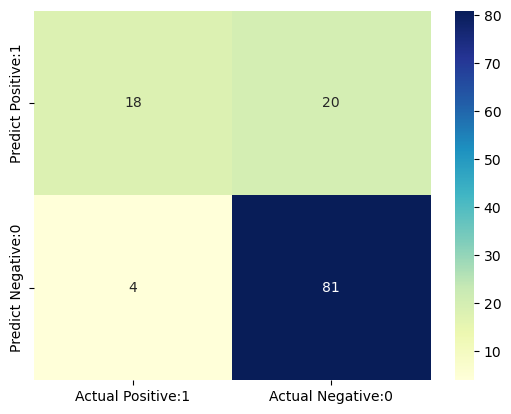

In [29]:
#Visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                         index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Precision 

- Precision is the proportion of all the models positive classification that are actually positive. It is more concerned with the positive class than the negative class.

In [30]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [31]:
precision = TP/float(TP + FP)
print('Precision: {0:0.4f}'.format(precision))

Precision: 0.4737


### False Positive Rate

In [32]:
false_positive_rate = FP/ (FP + TN)

print('False Positive Rate: {0:0.4f}'.format(false_positive_rate))

False Positive Rate: 0.1980


### True Positive Rate (Recall)

- Recall is the rate of correctly predicted actual positives

In [33]:
# A high recall means the model caught most of the positive cases which is a good sign
recall = TP / (TP+FN)

print('Recall or Sensitivity: {0:0.4f}'.format(recall))

Recall or Sensitivity: 0.8182


### Specificity

In [34]:
# evaluates how good is the model in avoiding false alarms. Crucial in a medical testing context
specifity = TN / (TN + FP)

print('Specificity: {0:0.4f}'.format(specifity))

Specificity: 0.8020


## Lower the threshold

In [35]:
from sklearn.preprocessing import binarize

# 1. Predict probabilities for the positive class (Loan Approved = 1)
y_prob = model.predict_proba(x_test)[:,1]

# 2. Convert y_test (0/1) into Yes/No labels for readability
y_test_labels = np.where(y_test == 1, "Yes", "No")

print("\n=======================THRESHOLD ANALYSIS========================\n")

# 3. Loop through threshold 0.1 to 0.9
for i in range(1,5):
    threshold = i/10

    # convert probabilities to binary classification
    y_pred_bin = binarize(y_prob.reshape(-1,1), threshold=threshold)

    # Convert into Yes/No labels
    y_pred_labels = np.where(y_pred_bin == 1, "Yes", "No")

    # Generate confusion matrix
    cm = confusion_matrix(y_test_labels, y_pred_labels)

    # TN, FP, FN, TP = cm.ravel() # unpacks the values of a confusion matrix into individual variables

    # calculate metrices
    accuracy = accuracy_score(y_test_labels, y_pred_labels)
    sensitivity = TP / (TP + FN)       # how well the model detects yes
    specificity = TN / (TN + FP)       # how well the model detects No

    print(
        f"Threshold = {threshold}\n"
        f"Confusion Matrix:\n{cm}\n"
        f"Correct Predictions: {TN+TP}\n"
        f"False Positives (Type I): {FP}\n"
        f"False Negatives (Type II): {FN}\n"
        f"Accuracy: {accuracy:.4f}\n"
        f"Sensitivity (Recall - Yes): {sensitivity:.4f}\n"
        f"Specificity (Recall - No): {specificity:.4f}\n"
        f"{'='*55}\n"
    )






=======================THRESHOLD ANALYSIS========================

Threshold = 0.1
Confusion Matrix:
[[ 5 33]
 [ 1 84]]
Correct Predictions: 99
False Positives (Type I): 20
False Negatives (Type II): 4
Accuracy: 0.7236
Sensitivity (Recall - Yes): 0.8182
Specificity (Recall - No): 0.8020

Threshold = 0.2
Confusion Matrix:
[[18 20]
 [ 4 81]]
Correct Predictions: 99
False Positives (Type I): 20
False Negatives (Type II): 4
Accuracy: 0.8049
Sensitivity (Recall - Yes): 0.8182
Specificity (Recall - No): 0.8020

Threshold = 0.3
Confusion Matrix:
[[18 20]
 [ 4 81]]
Correct Predictions: 99
False Positives (Type I): 20
False Negatives (Type II): 4
Accuracy: 0.8049
Sensitivity (Recall - Yes): 0.8182
Specificity (Recall - No): 0.8020

Threshold = 0.4
Confusion Matrix:
[[18 20]
 [ 4 81]]
Correct Predictions: 99
False Positives (Type I): 20
False Negatives (Type II): 4
Accuracy: 0.8049
Sensitivity (Recall - Yes): 0.8182
Specificity (Recall - No): 0.8020



## ROC - AUC

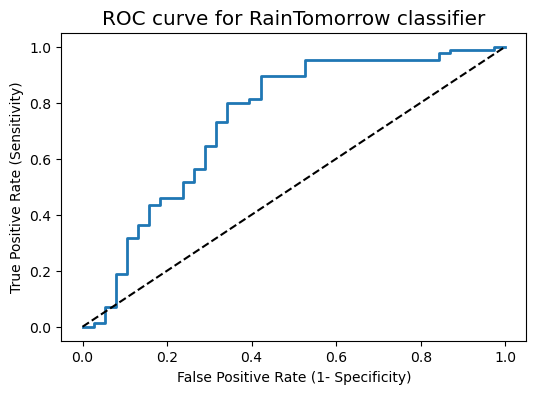

In [36]:
from sklearn.metrics import roc_curve

y_pred_prob = model.predict_proba(x_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label = 1) # Threshold means all the possible thresholds used internally (0 - 1.0)

plt.figure(figsize = (6,4))

plt.plot(fpr, tpr, linewidth = 2)

plt.plot([0,1], [0,1], 'k--') # Adds a dashed diagonal line, it represents perf of a random classifier(like flipping a coin)
# any useful model should be above the dashed line

plt.rcParams['font.size'] = 12

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1- Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [37]:
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test, y_prob)
print(f"ROC AUC : {ROC_AUC:4f}")

ROC AUC : 0.739938


In [38]:
# cross validated ROC AUC

from sklearn.model_selection import cross_val_score

Cross_val_ROC_AUC= cross_val_score(model, x_train, y_train, cv = 5, scoring = 'roc_auc').mean()

print(f"Cross-validation scores: {Cross_val_ROC_AUC}")

Cross-validation scores: 0.7095572894540579


## k_Fold Cross Validation

In [39]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, x_train, y_train, cv = 5, scoring = 'accuracy')

print(f"Cross-validation scores: {scores}")

Cross-validation scores: [0.83838384 0.82653061 0.82653061 0.7755102  0.76530612]


- We can summarize the cross-validation scores by calculating its mean

In [40]:
# compute average cross-validation score

print(f'Average cross-validation score: {scores.mean():4f}')

Average cross-validation score: 0.806452


Our, original model score is found to be 0.8049. The cross validation score is 0.8065. This shows that cross-validation has not resulted to a significant model improvement.

## Hyperparameter Optimization using GridSearch CV

In [41]:
# Logistic regression works well with standardized values
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [42]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression(solver='liblinear', random_state=0)

parameters =[{'penalty': ['l1','l2'],'C':[1,10]}]

grid_search = GridSearchCV(estimator= model,
                           param_grid= parameters,
                           scoring= 'accuracy',
                           cv = 3,
                           n_jobs =2,
                           verbose=1)

grid_search.fit(X_train_scaled, y_train)


Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             n_jobs=2, param_grid=[{'C': [1, 10], 'penalty': ['l1', 'l2']}],
             scoring='accuracy', verbose=1)

### Viewing the Best Parameters

In [43]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 1, 'penalty': 'l1'}


### Viewing the Best Cross-validated Accuracy

In [45]:
print("Best CV Accuracy:", grid_search.best_score_)

Best CV Accuracy: 0.8064367300114719


- The model achieved 80.64% accuracy on unseen data during cross-validation

### Getting the Best Model

- GridSearch CV automatically builds and stores the best model for you

In [46]:
best_model = grid_search.best_estimator_

- We can now use best_model for future predictions

In [52]:
y_pred = best_model.predict(x_test)
y_pred_prob = best_model.predict_proba(x_test)[:, 1]

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [53]:
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.6910569105691057


### ROC-AUC

In [55]:
print("ROC AUC:", roc_auc_score(y_test, y_pred_prob))

ROC AUC: 0.7219814241486068


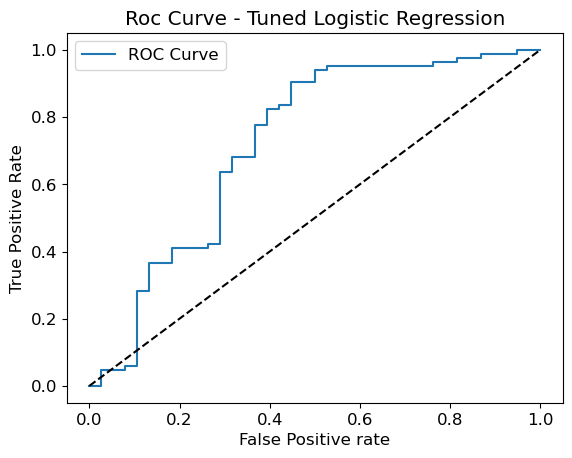

In [56]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive rate")
plt.ylabel("True Positive Rate")
plt.title("Roc Curve - Tuned Logistic Regression")
plt.legend()
plt.show()